# **Intro**
This notebook serves as a simplified / streamlined version of my codebase where I only include functional and somewhat finalized code. Upon this notebooks completion, we will move the codebase to github or another centralized source of truth for both transparency and to move towards building our interactive web app.
<br>
## Packages
Why use the packages we used?
<br>pandas: Dataframe datastructure
<br>requests: Downloading files from links
<br>seaborn: wrapping matplotlib plotting
<br>numpy: Mathematical functions
<br>matplotlib.pyploy: Adding features to seaborn plots
<br>dateutil: Date math
<br>datetime: String to date object conversions for date math
<br>scipy: Statistical analysis
<br>statsmodels.api: Regression Analysis
<br>scipy.stats: Currently just using shapiro testing for testing for normal data


In [1]:
# All packages used (currently)
import pandas as pd
import requests as rq # --> WIP, looking to use this package to query the raw data from a URL
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser
from datetime import date, timedelta, datetime
from scipy import stats
import scipy
import statsmodels.api as sm
from scipy.stats import shapiro

# Not sure if this is still neccesary. . .
if(sns.__version__ != '0.11.2'):
    print("Please ensure you're using Seaborn version 0.11.2. If you are seeing this, please go to this page and update Seaborn to the correct version.")
    print("https://stackoverflow.com/questions/5183672/how-do-i-update-a-python-package")
    print("Your Current Seaborn Version: ", sns.__version__)
else:
    print("You are using the correct version of Seaborn.")

You are using the correct version of Seaborn.


## Data Collection
Here we utilize the dictionary and dataframe data structures in conjunction with the requests package to download, import, and interact with the data used in these analyses. To explain, we generate 3 dictionaries with the same keys representing the shorthand name of the dataframe to be moved into python. The first dictionary contains values representing the download link for the respective dataframe. The second dictionary contains values representing the filenames for the respective dataframe once downloaded. The final dataframe contains values representing the imported data in python ready for interaction

In [2]:
# Create a dictionary containing the description/name of the dataset, where these keys map to the url which they are downloaded from
url_dict = {
    "cases": "https://static.usafacts.org/public/data/covid-19/covid_confirmed_usafacts.csv",
    "deaths": "https://static.usafacts.org/public/data/covid-19/covid_deaths_usafacts.csv",
    "vaccine": "https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/us_data/time_series/vaccine_data_us_timeline.csv",
    "old_state": "https://docs.google.com/spreadsheets/d/1zu9qEWI8PsOI_i8nI_S29HDGHlIp2lfVMsGxpQ5tvAQ/export?format=csv&gid=1489353670",
    "mask_comp_20": "https://ihmecovid19storage.blob.core.windows.net/latest/data_download_file_reference_2020.csv",
    "mask_comp_21": "https://ihmecovid19storage.blob.core.windows.net/latest/data_download_file_reference_2021.csv",
    "county_pop": "https://static.usafacts.org/public/data/covid-19/covid_county_population_usafacts.csv"
}

# Create a dictionary containing the description/name of the dataset, where these keys map to the name of the file when downloaded from the above urls
filenames_dict = {
    "cases": "covid_confirmed_usafacts.csv",
    "deaths": "covid_deaths_usafacts.csv",
    "vaccine": "vaccine_data_us_timeline.csv",
    "old_state": "COVID-19 US state policy database (CUSP) - Face Masks.csv",
    "mask_comp_20": "data_download_file_reference_2020.csv",
    "mask_comp_21": "data_download_file_reference_2021.csv",
    "county_pop": "covid_county_population_usafacts.csv"
}

# Create a dictionary which will house the data as we load it into Python
data_io_dict = {} 

# loop through the keys in the url_dict and fill the data_io_dict with the same keys, but df values
for x in url_dict.keys():
    print(x, url_dict[x])
    gt = rq.get(url_dict[x])
    with open(filenames_dict[x], "wb") as f:
        f.write(gt.content)
        data_io_dict[x] = pd.read_table(filenames_dict[x], sep = ",")

print("DONE!")

cases https://static.usafacts.org/public/data/covid-19/covid_confirmed_usafacts.csv
deaths https://static.usafacts.org/public/data/covid-19/covid_deaths_usafacts.csv
vaccine https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/us_data/time_series/vaccine_data_us_timeline.csv
old_state https://docs.google.com/spreadsheets/d/1zu9qEWI8PsOI_i8nI_S29HDGHlIp2lfVMsGxpQ5tvAQ/export?format=csv&gid=1489353670
mask_comp_20 https://ihmecovid19storage.blob.core.windows.net/latest/data_download_file_reference_2020.csv
mask_comp_21 https://ihmecovid19storage.blob.core.windows.net/latest/data_download_file_reference_2021.csv
county_pop https://static.usafacts.org/public/data/covid-19/covid_county_population_usafacts.csv
DONE!


In [3]:
data_io_dict["old_state"].head()

,State,State Abbreviation,State FIPS Code,Public face mask mandate start,Public face mask mandate start x2,Face mask mandate enforced by fines,Face mask mandate enforced by criminal charge/citation,No legal enforcement of face mask mandate,Business face mask mandate start,Face mask mandate end for fully vaccinated,...,Face mask mandate resumed with exemptions,Face mask mandate in schools for 2021-22 school year,Face mask mandate end,Face mask mandate end x2,Public face mask mandate currently in place,Banned school face mask mandates,Banned other local face mask mandates,Judicial decision blocked state from enforcing bans on mask mandates in schools,Unnamed: 19,Notes
0,Alabama,AL,1.0,7/16/2020,0,0,0,1,5/11/2020,4/9/2021,...,0,0,4/9/2021,0,0,0,0,0,NaN,AL - 7/13 order mandated face mask use in publ...
1,Alaska,AK,2.0,4/24/2020,0,1,1,0,4/24/2020,5/22/2021,...,0,0,5/22/2020,0,0,0,0,0,NaN,AK - Businesses subject to fine and/or closure...
2,Arizona,AZ,4.0,0,0,0,0,1,5/8/2020,3/25/2021,...,0,0,3/25/2021,0,0,6/30/2021,3/25/2021,0,NaN,AZ - Prohibits government officials from requi...
3,Arkansas,AR,5.0,7/20/2020,0,1,1,0,5/11/2020,3/30/2021,...,0,0,3/30/2021,0,0,4/28/2021,4/28/2021,8/7/2021,NaN,AR - Recommended but not required to wear face...
4,California,CA,6.0,6/18/2020,0,0,0,1,5/5/2020,6/15/2021,...,0,8/2/2021,0,0,1,0,0,0,NaN,CA - Mandated face mask use by grocery store e...


## Basic / Quick Data Manipulations
This code block does a few things
1. Convert county populations into state populations and define population scalar
2. Remove Georgia the country from mask compliance to avoid it interfering with Georgia the State
3. Merge mask compliance from 2020 and 2021 (And 2022 once it is added to the pool of data)

In [4]:
# build dataframe of state populations to scale case and death data
data_io_dict["state_pop"] = data_io_dict["county_pop"][["population", "State"]].groupby("State").sum().reset_index()
# build scalar = population / 200,000 to use in metrics
pop_scalar = 200000
data_io_dict["state_pop"]["Scalar"] = data_io_dict["state_pop"]["population"] / pop_scalar

# after importing mask compliance, quickly remove the country georgia to not confuse with the state georgia --> remove location_id == 35
data_io_dict["mask_comp_20"] = data_io_dict["mask_comp_20"][data_io_dict["mask_comp_20"]["location_id"] != 35]
data_io_dict["mask_comp_21"] = data_io_dict["mask_comp_21"][data_io_dict["mask_comp_21"]["location_id"] != 35]

# combine the mask_comp datasets from 2020 and 2021 for use in building tbhe final dataframe
    # before concating mask_comp_21, I must set the dates to the same format as in the 2020 dataset, as those conventions are used to string match dates
data_io_dict["mask_comp_concat"] = pd.concat([data_io_dict["mask_comp_20"], data_io_dict["mask_comp_21"]], axis = 0)[["location_name", "mask_use_mean", "date"]]
data_io_dict["mask_comp_concat"] = data_io_dict["mask_comp_concat"].loc[data_io_dict["mask_comp_concat"]["location_name"].isin(set(data_io_dict["old_state"]["State"]))]


## Building Mask Mandate Status in Each State on Each Date
This function takes the old_state df and converts it's simple columns demarcating when a mask mandate was in place and converts it to a day by day and state by state basis.

In [5]:
def define_mask_mandates(masks, start, end):
    # this function should convert the collected state mask mandate data to a full date by date 0/1 (T/F) matrix
    print("I apoligize in advance, my implimentation is slooooooow :(")
    # start the return df by pulling out the states
    ret = pd.DataFrame(masks["State"])
    
    # Use modified stack overflow code to make a list of dates
    dates = []
    sdate = date(int(start.split('-')[0]), int(start.split('-')[1]), int(start.split('-')[2]))   # start date
    edate = date(int(end.split('-')[0]), int(end.split('-')[1]), int(end.split('-')[2]))   # end date
    delta = edate - sdate       # as timedelta
    for i in range(delta.days + 1):
        day = sdate + timedelta(days=i)
        dates.append(day)
    
    # Now I can get to the loop which will build the rest of the matrix
    display_counter = 0
    for day in dates:
        if display_counter > 30:
            print(day)
            display_counter = 0
        display_counter+=1
        # for each date we care to include from above. . .
        # define a new column filled with zeros from the current date
        ret[day] = [0]*ret.shape[0]
        for r in range(ret.shape[0]):
            # loop through each state in the current column
            state = ret.iloc[r,0]
            # grab the state for selecting rows from the masks dataframe
            
            # Below is the branching if/else scheme used to assign weights to the ret dataframe
            # NOTE that I can/intend explore expanding this weight system to be more inclusive than a strict 0/1
            if masks.loc[masks["State"] == state, "Public face mask mandate start"].values[0] == "0":
            # if there was no mandate. . .
                ret.loc[ret["State"] == state, day] = 0
                # set val in ret to 0
            else:
            # else: ie there was a mandate of some kind
                if day < parser.parse(masks.loc[masks["State"] == state, "Public face mask mandate start"].values[0]).date():
                # if we are before the start of the mandate
                    ret.loc[ret["State"] == state, day] = 0
                    # set val in ret to 0
                else:
                # else: ie there was a mandate and we are not before it
                    if masks.loc[masks["State"] == state, "Face mask mandate end"].values[0] == "0":
                    # if the mandate never ended then we must be in a mandate
                        ret.loc[ret["State"] == state, day] = 1
                        # set val in ret to 1
                    elif day < parser.parse(masks.loc[masks["State"] == state, "Face mask mandate end"].values[0]).date(): 
                    # elif the date is before the end of the first mandate
                        ret.loc[ret["State"] == state, day] = 1
                        # set val in ret to 1
                    else:
                    # else: ie the end of the first mandate exists AND we must be after it
                        # here is where the condition scheme must begin for the second mandate
                        if masks.loc[masks["State"] == state, "Public face mask mandate start x2"].values[0] == "0":
                        # if there was no second mandate
                            ret.loc[ret["State"] == state, day] = 0
                            # set the val in ret to 0
                        else:
                        # else: ie there was a second mandate
                            if day < parser.parse(masks.loc[masks["State"] == state, "Public face mask mandate start x2"].values[0]).date():
                            # if we are before the start of the second mandate
                                ret.loc[ret["State"] == state, day] = 0
                                # set val in ret to 0
                            else:
                            # else: ie there was a second mandate and we are not before it
                                if masks.loc[masks["State"] == state, "Face mask mandate end x2"].values[0] == "0":
                                # if the second mandate has not ended then we must be in a mandate
                                    ret.loc[ret["State"] == state, day] = 1
                                    # set val in ret to 1
                                elif day < parser.parse(masks.loc[masks["State"] == state, "Face mask mandate end x2"].values[0]).date():
                                # elif the date is before the end of the second mandate
                                    ret.loc[ret["State"] == state, day] = 1
                                    # set val in ret to 1
                                else:
                                # else: ie the end of the second mandate exists AND we must be after it
                                    ret.loc[ret["State"] == state, day] = 0
                                    # set val in ret to 0
                
    # return our dataframe of states mask mandate policy by date
    print("DONE!")
    return(ret)

msk = define_mask_mandates(data_io_dict['old_state'], data_io_dict['cases'].columns[4], data_io_dict['cases'].columns[-1])
# Adding this msk dataframe to our data_dict so that it can be passed with everything else to the final_df function
data_io_dict["msk"] = msk
msk.to_csv("mask_mandates.csv", sep = ',')
data_io_dict["msk"].head()

I apoligize in advance, my implimentation is slooooooow :(
2020-02-22
2020-03-24
2020-04-24
2020-05-25
2020-06-25
2020-07-26
2020-08-26
2020-09-26
2020-10-27
2020-11-27
2020-12-28
2021-01-28
2021-02-28
2021-03-31
2021-05-01
2021-06-01
2021-07-02
2021-08-02
2021-09-02
2021-10-03
2021-11-03
2021-12-04
2022-01-04
DONE!


,State,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,...,2021-12-27,2021-12-28,2021-12-29,2021-12-30,2021-12-31,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05
0,Alabama,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alaska,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arizona,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arkansas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,California,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


## Aggregating our Data Together
Before we analyze and visualize the data, I think we should convert it all into one dataframe to easily interact with these functions. This will make it far easier to have consistency in our calling of data beyond this point, and will centralize the aggregation and building of metrics to one "final" location

In [31]:
# Improvements / Thoughts while making this function

    # 1. Aside from all the data, what is the most effective thing to pass to this function? Is it the key of interest (koi), states of interest, or dates of interest that provide the most effective subsetting of the data? For now, I will keep the koi input and add more as I see fit
    # 2. Goal should be to increase reusability and speed --> less looping & more np
    
def generate_final_df(data_dict):
    # This function should take the data dictionary and a key of interest and build the final_df as described above
    
    # build abriviation dictionaries that can be used to move from a state string to the abriviation for the state or vice versa
    abriv = {}
    abriv_rev = {}
    for x in range(0,data_dict['old_state'].shape[0]-1):
        abriv[data_dict['old_state'].iloc[x,1]] = data_dict['old_state'].iloc[x,0]
        abriv_rev[data_dict['old_state'].iloc[x,0]] = data_dict['old_state'].iloc[x,1]
    
    # setup the empty final_df
    final_df = 0
    
    # setup looping logic to assemble metrics state by state for the queried metrics
    for state in list(abriv.keys()):
        print(state)
        
        # Collect State Data on Pandemic Outcomes
        
        # start temporary df we define through each iteration of the loop with a column of dates as decribed from the koi ("deaths" or "cases")
        df = pd.DataFrame({"date": data_dict["cases"].columns[4:]})
        
        # Add a state and abriv column to the df for easy subsetting whenever neccesary
        df["Abriviation"] = [state]*len(data_dict["cases"].columns[4:])
        df["State"] = [abriv[state]]*len(data_dict["cases"].columns[4:])
        
        ###############################
        
            ### CASES ###
        # Add a total confirmed and a new daily column to the df
        c = data_dict['cases'].loc[data_dict["cases"]['State'] == state]
        c_header = c.columns[4:]
        tc = c[c_header].sum(axis = 0).values
        df["Total Confirmed Cases"] = tc
        df["New Daily Cases"] = np.insert(np.diff(tc), 0, 0)
        
        # Add a weekly rolling average
        df["Biweekly Rolling Average New Daily Cases"] = df["New Daily Cases"].rolling(window = 14, min_periods = 1).mean()
        
        # Scale these columns by the population scalar of the given state
        df["New Daily Cases per "+ str(pop_scalar)] = df["New Daily Cases"] / data_io_dict['state_pop'].loc[data_io_dict['state_pop']["State"] == state, "Scalar"].values[0]
        df["Biweekly Rolling Average New Daily Cases per "+ str(pop_scalar)] = df["Biweekly Rolling Average New Daily Cases"] / data_io_dict['state_pop'].loc[data_io_dict['state_pop']["State"] == state, "Scalar"].values[0]
        
        ###############################
        
            ### DEATHS ###
        # Add a total confirmed and a new daily column to the df
        d = data_dict['deaths'].loc[data_dict["deaths"]['State'] == state]
        d_header = d.columns[4:]
        td = d[d_header].sum(axis = 0).values
        df["Total Confirmed Deaths"] = td
        df["New Daily Deaths"] = np.insert(np.diff(td), 0, 0)
        
        # Add a weekly rolling average
        df["Biweekly Rolling Average New Daily Deaths"] = df["New Daily Deaths"].rolling(window = 14, min_periods = 1).mean()
        
        # Scale these columns by the population scalar of the given state
        df["New Daily Deaths per "+ str(pop_scalar)] = df["New Daily Deaths"] / data_io_dict['state_pop'].loc[data_io_dict['state_pop']["State"] == state, "Scalar"].values[0]
        df["Biweekly Rolling Average New Daily Deaths per "+ str(pop_scalar)] = df["Biweekly Rolling Average New Daily Deaths"] / data_io_dict['state_pop'].loc[data_io_dict['state_pop']["State"] == state, "Scalar"].values[0]
        
        ###############################
        
            ### HOSPITALIZATIONS ###
        
        ###############################
           
            ### VACCINATIONS ###
            # get the state we care about
        vax = data_dict["vaccine"].loc[data_dict["vaccine"]["Province_State"] == abriv[state]].reset_index()
        
            # get the dates in our list of original dates
        vax = vax.loc[vax["Date"].isin(data_dict["cases"].columns[4:])]

            # Pull out three vaccines used in the USA
        vax = vax.loc[vax["Vaccine_Type"].isin(["Janssen", "Moderna", "Pfizer"]), ["Date", "Stage_One_Doses", "Stage_Two_Doses"]]
        
            # groupby sum the data
        vax = vax.groupby(["Date"]).sum()
        
            #unstack the groupby
        vax = vax.reset_index()
        
            # Define fully vaxed
        vax["Summage"] = vax["Stage_One_Doses"] + vax["Stage_Two_Doses"]
        extract = vax["Summage"]
        zeros = [0]*14
        vax["CDC Fully Vaccinated"] = pd.Series(zeros).append(vax["Summage"][:-14]).values      
        
            # pull out our metric
        s = data_dict["cases"].columns[4]
        e = vax.loc[0,"Date"]
        zeros = [0]*(datetime.strptime(e, '%Y-%m-%d') - datetime.strptime(s, '%Y-%m-%d')).days
        
        v = vax["CDC Fully Vaccinated"]
        
        print(s,e, len(v))
        df["Proportion of the State Fully Vaccinated"] = pd.Series(zeros).append(v).values
        df["Proportion of the State Fully Vaccinated"] = df["Proportion of the State Fully Vaccinated"] / data_dict['state_pop'].loc[data_dict['state_pop']["State"] == state, "population"].values[0]
       
        ###############################
        
            ### MASKS ###
        
        # Add the mandate status for the days of interest
        df["Mandate?"] = data_dict["msk"].loc[data_dict["msk"]["State"] == "Massachusetts"].values[0].flatten()[1:]
    
        # Add day by day mask compliance
        comp = data_dict["mask_comp_concat"].loc[data_dict["mask_comp_concat"]["location_name"] == abriv[state]]
        s = data_dict["cases"].columns[4]
        e = comp.iloc[0,2]
            # get the index of the last position we wish to keep in the data
        ind = comp.loc[comp["date"] == data_dict["cases"].columns[-1], "date"].index.values[0]
            # toss the data after that index
        comp = comp.loc[comp.index.values <= ind, "mask_use_mean"]
             # get preceeding zeros
        zeros = [0]*(datetime.strptime(e, '%Y-%m-%d') - datetime.strptime(s, '%Y-%m-%d')).days
            # load in data appened to each other
        df["Mask Compliance"] = pd.Series(zeros).append(comp).values
        
        ###############################
        
            ### MORTALITY ###
        
        # Case vs Death Metrics
        df["Reported Mortality"] = df["Total Confirmed Deaths"] / df["Total Confirmed Cases"]
        
        # Based on the info from the CDC, these are the likely highest and lowest mortality figures
        # I used the 95% confidence interval the CDC gave for under-reported cases and deaths to maximize and minimize a likely mortality range
        df["CDC Lowest Mortality"] = df["Reported Mortality"] * 1.29/4.7
        df["CDC Highest Mortality"] = df["Reported Mortality"] * 1.34/3.4
        
        ###############################
        
        # Natural Immunity? Hazarding an early and wild guess that we can approximate this if this is not how the statistic is recorded
        df["Natural Immunity?"] = df["Total Confirmed Cases"] - df["Total Confirmed Deaths"]
        df["Natural Immunity Proportion?"] = df["Natural Immunity?"] / data_dict['state_pop'].loc[data_dict['state_pop']["State"] == state, "population"].values[0]
        
        # Account for asymptomatic cases and or lack of testing?
        
        ###############################
        
        # Total Immunity? Not a fan of this because it doesnt make a distinction for people who are vaccinated and also recovered from covid
        # factor in underreporting and/or breakthrough cases statistics to remove them from the total immunity category as a double count
        df["Total Immunity"] = df["Natural Immunity Proportion?"] + df["Proportion of the State Fully Vaccinated"]
        
        ###############################
        
        # Save the df we just created
        
        # During the first iteration, assign the df over the final_df
        if state == list(abriv.keys())[0]:
            final_df = df
        else:
            # Any subsequent iteration, append the iterated df to the final_df
            final_df = pd.concat([final_df, df], axis = 0)[df.columns.tolist()]
    
    return(final_df)


final_df = generate_final_df(data_io_dict)

final_df.to_csv("final_df.csv", sep = ",")

final_df

AL
2020-01-22 2020-12-10 392
AK
2020-01-22 2020-12-10 392
AZ
2020-01-22 2020-12-10 383


ValueError: Length of values does not match length of index

## Plotting Function(s)
These functions serve as our basic visualization tools. These provide a strong starting point for building a "front end" to accompany these plotting functions. As currently constructed, the functions are given as arguments what is needed to build the plot and the functions return a plot. Wrapping this code in a UI will allow the user to modify the passed arguments and will return the changed plot to the UI.

In [7]:
def final_df_timeplot(start_d, end_d, df, states, y):
    # passed arguments
        # start_d, end_d: start and end date, as a string such as "2021-10-07" formatted as "%Y-%m-%d"
        # df: the dataframe which will be subset by date and state with features to plot
        # states: list of states which will be subset and displayed seperately by color
        # y: column to pair to the y variable when plotting
    form = "%Y-%m-%d"
    # Subset out states
    sub_df = df.loc[df["State"].isin(set(states))]
    # Subset out time
    # convert date column to a series
    ds = sub_df["date"]
    # use this to create list of T/F
    bool_l = []
    for x in ds.values:
        bool_l.append((datetime.strptime(x, form) >= datetime.strptime(start_d, form)) and (datetime.strptime(x, form) <= datetime.strptime(end_d,form)))
    # boolean index
    sub_df = sub_df.loc[bool_l]
    
    # return plot with factors
    plotsize = plt.gcf()
    plotsize.set_size_inches(18,12)
    plot = sns.lineplot(x = "date", y = y, hue = "State", data = sub_df.reset_index())
    plot = plt.xticks(ticks = pd.date_range(start = start_d, end = end_d, freq="45d").strftime("%Y-%m-%d").tolist())
    plot = plt.title(y + " for queried states from " + start_d + " to " + end_d)
    sns.set_style("whitegrid")
    
    return plot

def final_df_subset(states, start_d, end_d, df):
    # passed arguments
        # start_d, end_d: start and end date, as a string such as "2021-10-07" formatted as "%Y-%m-%d"
        # df: the dataframe which will be subset by date and state with features to plot
        # states: list of states which will be subset and displayed seperately by color
    form = "%Y-%m-%d"
    # Subset out states
    sub_df = df.loc[df["State"].isin(set(states))]
    # Subset out time
    # convert date column to a series
    ds = sub_df["date"]
    # use this to create list of T/F
    bool_l = []
    for x in ds.values:
        bool_l.append((datetime.strptime(x, form) >= datetime.strptime(start_d, form)) and (datetime.strptime(x, form) <= datetime.strptime(end_d,form)))
    # boolean index
    sub_df = sub_df.loc[bool_l]
    return sub_df
    
def final_df_timeplot2(start_d, end_d, df, states, y):
    # passed arguments
        # start_d, end_d: start and end date, as a string such as "2021-10-07" formatted as "%Y-%m-%d"
        # df: the dataframe which will be subset by date and state with features to plot
        # states: list of states which will be subset and displayed seperately by color
        # y: column to pair to the y variable when plotting
    form = "%Y-%m-%d"
    # Subset out states
    sub_df = df.loc[df["State"].isin(set(states))]
    # Subset out time
    # convert date column to a series
    ds = sub_df["date"]
    # use this to create list of T/F
    bool_l = []
    for x in ds.values:
        bool_l.append((datetime.strptime(x, form) >= datetime.strptime(start_d, form)) and (datetime.strptime(x, form) <= datetime.strptime(end_d,form)))
    # boolean index
    sub_df = sub_df.loc[bool_l]
    
    # return plot with factors
    plotsize = plt.gcf()
    plotsize.set_size_inches(18,12)
    
    figure, axis = plt.subplots(nrows = len(y), ncols = 1, sharex = True, figsize=(30, len(y)*10))
    sns.set_style("whitegrid")

    for metric, ax in zip(y, axis.flat):
        print(metric)
        sns.lineplot(x = "date", y = metric, hue = "State", data = sub_df.reset_index(), ax = ax)
        plt.title(metric + " for queried states from " + start_d + " to " + end_d)
        
    plt.xticks(pd.date_range(start = start_d, end = end_d, freq="45d").strftime("%Y-%m-%d").tolist(), rotation = "vertical")
    plt.rc('font', size=20)
    plt.show()


### Define "Test States"

In [8]:
states = list(set(final_df["State"]))
states = sorted(states)
test1 = ["Texas", "California", "New York", "Florida"]
test2 = ["New Hampshire", "Pennsylvania", "Michigan", "Illinois"]
test3 = ["Montana", "Delaware", "Virginia", "Louisiana"]
NE_test = ["Maine", "Massachusetts", "New Hampshire", "Rhode Island", "Vermont", "Connecticut"]

### Plotting Timeseries Data

Biweekly Rolling Average New Daily Cases per 200000
Biweekly Rolling Average New Daily Deaths per 200000
Reported Mortality
Mask Compliance
Proportion of the State Fully Vaccinated


<Figure size 1296x864 with 0 Axes>

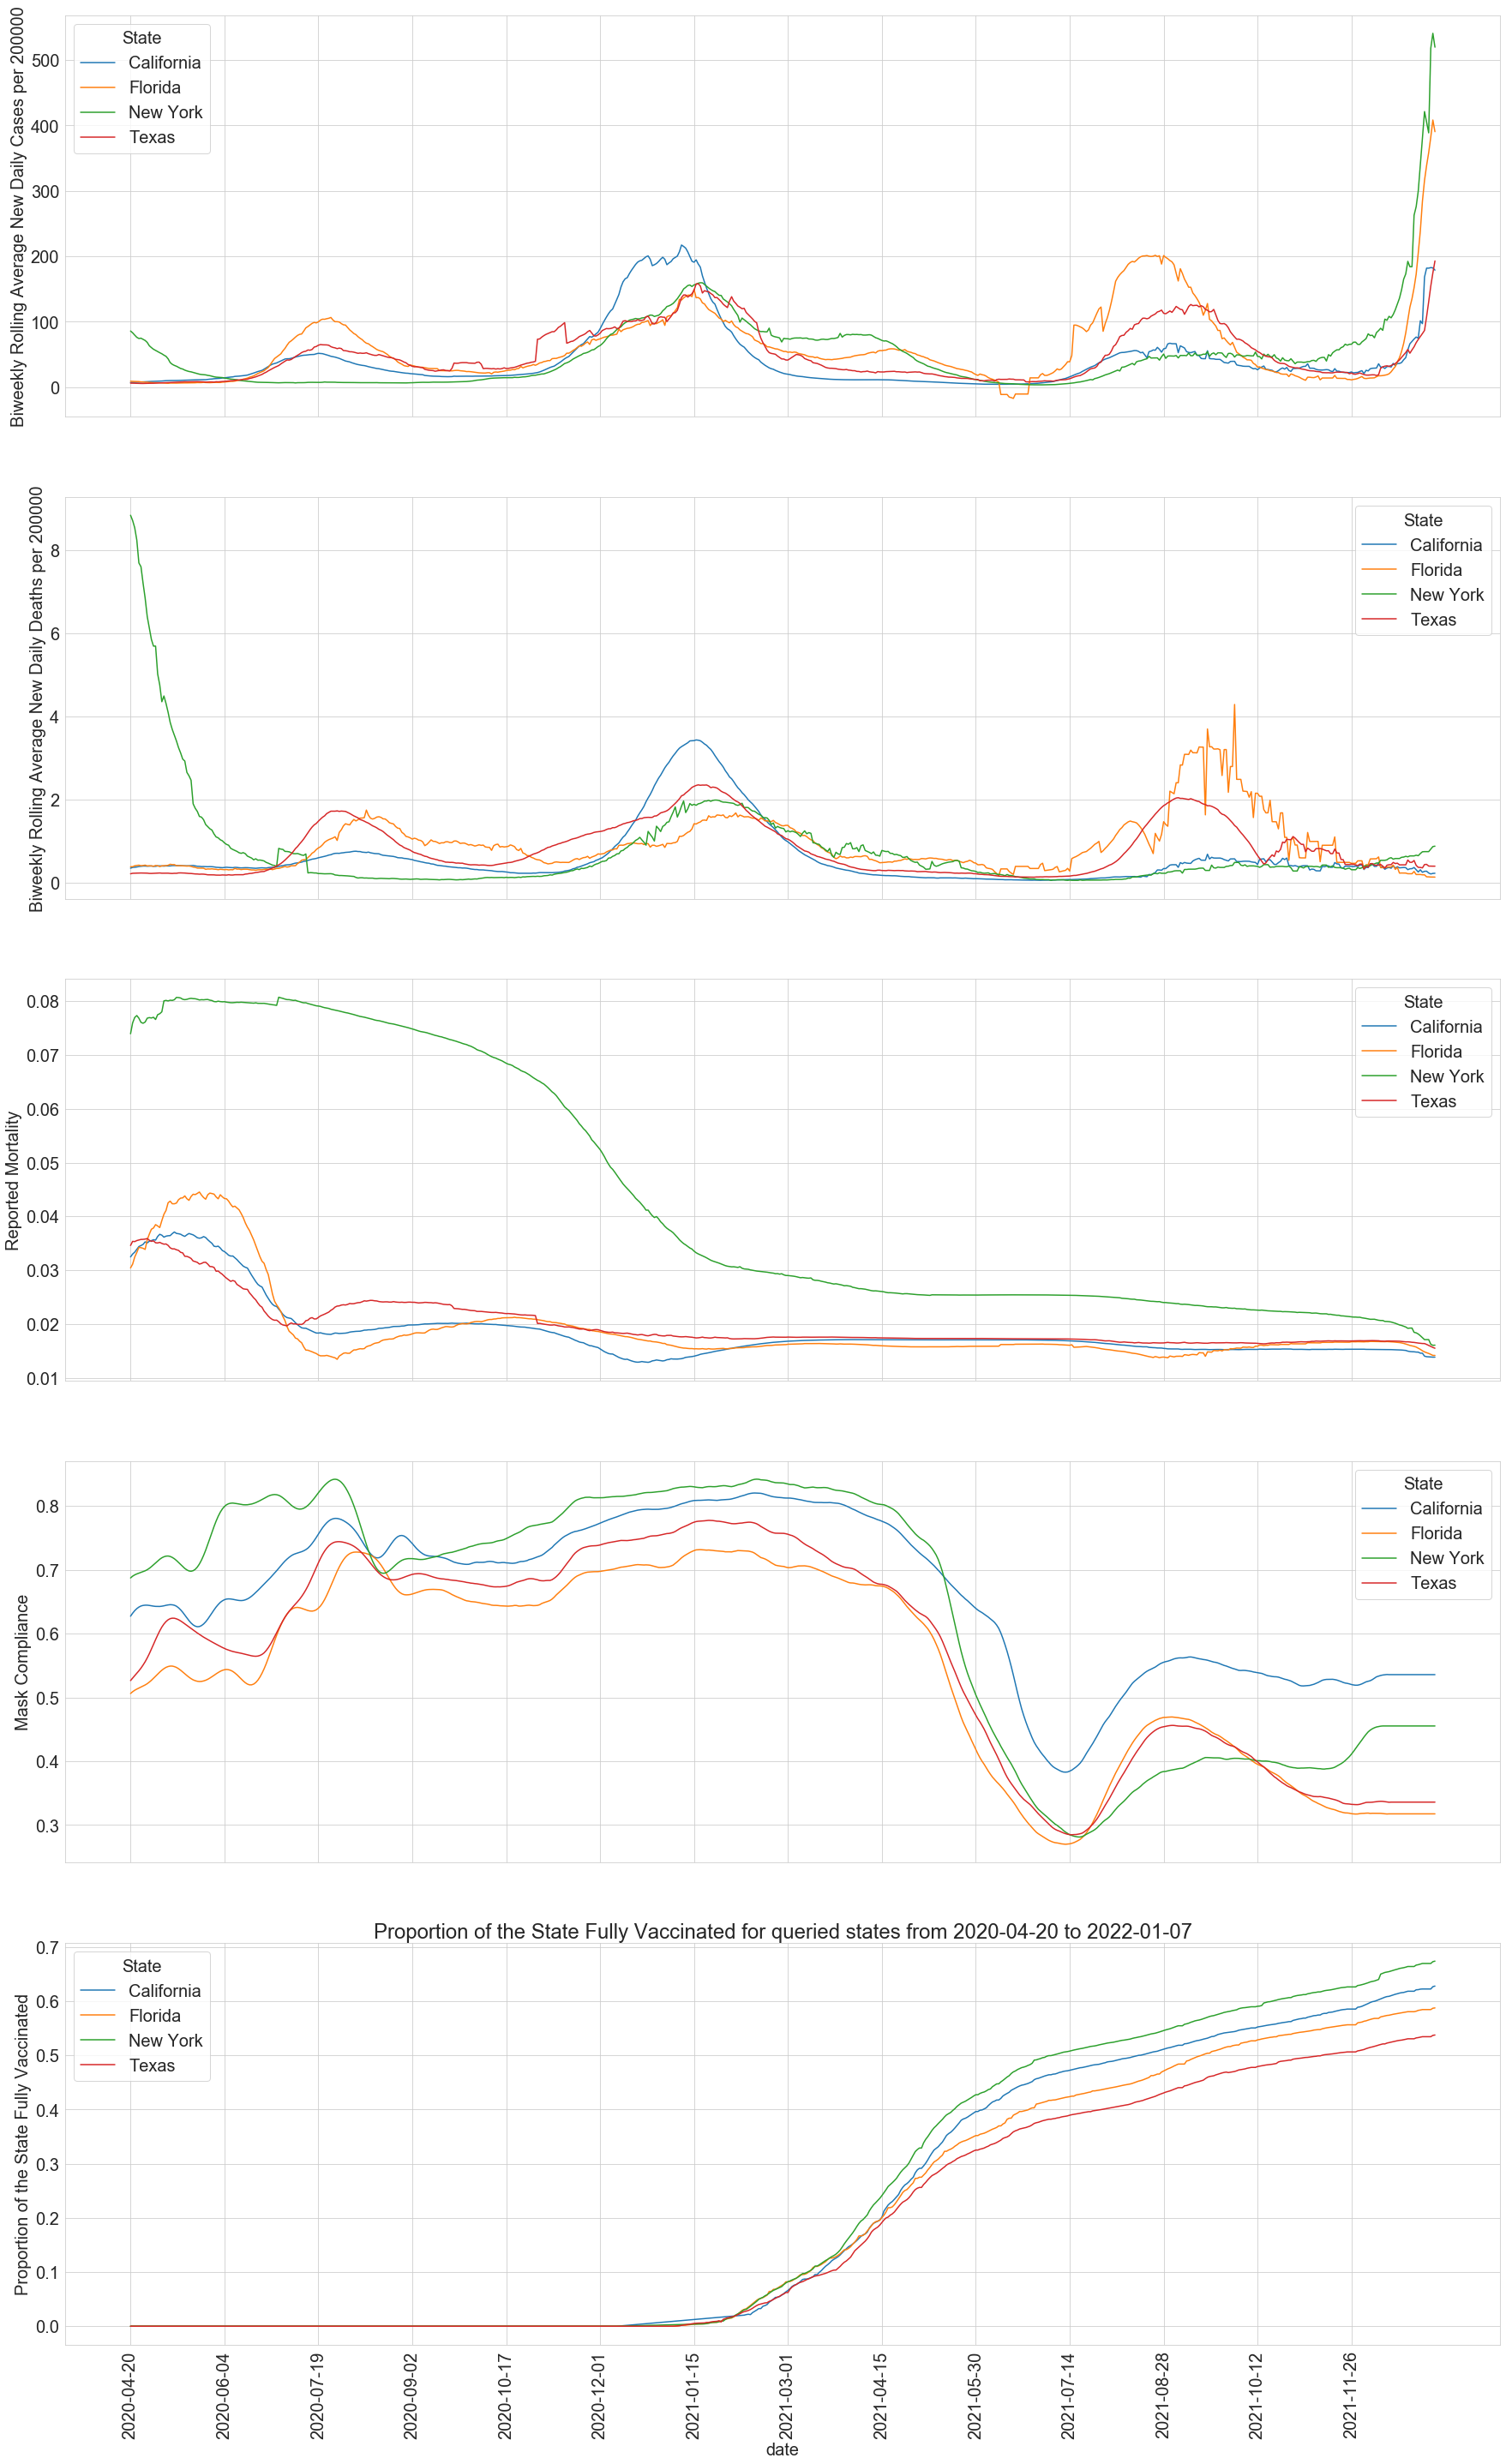

In [32]:
multi = final_df_timeplot2(start_d = "2020-04-20", end_d = "2022-01-07", df = final_df, states = test1, y = ["Biweekly Rolling Average New Daily Cases per 200000", "Biweekly Rolling Average New Daily Deaths per 200000", "Reported Mortality", "Mask Compliance", "Proportion of the State Fully Vaccinated"])
multi

## New Factors or Data to Bring in. . .
1. Population Density
2. Age Demographics
3. Temperature / Ability / Amount outside
4. Flight Data 
5. **HOSPITALIZATIONS**
6. **Improve Vaccination Metric(s)** --> WIP, Working to change to CDC definition, 
<br><br>
Fully Vaccinated, according to the CDC, is represented by anyone 2 weeks beyond their first J&J dose or 2 weeks beyond their second dose of an mRNA vaccine
<br><br>
Daily proportion of population fully vaccinated = (J and J doses administered 2 weeks prior + Moderna Stage 2 doses administered 2 weeks prior + Pfizer Stage 2 doses administered 2 weeks prior) / State Population
<br><br>
For each date in time
    <br> Find the date 2 weeks ago
    <br> sum moderna and pfizer stage 2 doses with j&J stage 1 doses
    <br> Iterate
<br><br>
7. Natural Immunity = Total Cases - Total Deaths?
 

## Stats to pull in . . .
1. . . .ANOVA of different policies (lockdown, capacity restrictions, curfew, lockdowns, school closures, in regards to cases, hospitalizations and deaths.
2. Is an increase in mask wearing correlated with a decrease in transmission?
3. Further, does the same trend exist with mask mandates for schools throughout the 2021-2022 school year?
4. Does a mask mandate cause a statistically significant increase in mask wearing? --> Already done, but somewhat broken?
5. Is there an quantifyable decrease in vaccine efficacy over time on a population level?
6. How does a lockdown affect the course of the pandemic?

RMANOVA?

http://oak.ucc.nau.edu/rh232/courses/EPS625/Handouts/RM-ANOVA/Understanding%20Repeated-Measures%20ANOVA.pdf

Evolutionary Model?

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3588907/

Timeseries regression? <br>
http://www.ams.sunysb.edu/~zhu/ams586/Time_Regression.pdf <br>
https://sites.psu.edu/movingpsychology/2012/11/29/statistics-regression-and-time-series-analysis/ <br>
https://medium.com/@d.moni91/rossmann-store-sales-sales-forecasting-using-time-series-regression-in-python-1e7ad6fb0aec <br>

*** TIME PERIODS OF INTEREST & GROUPS OF INTEREST CLEARLY DEFINED FOR STATISTICAL TESTING

Normalize the data (dependent variable)
Assess the seasonality of the timeseries data --> pattern

## Expansions (The Fun Part)
1. Interactive Web App to serve as a transparent record of our analyses (Github, Webapp / Website, etc)
2. Predictive model of future pandemic outcomes
3. Econometric analyses public health policy; Economic externalities vs Benefits ie reduction in cases, hospitalizations or deaths
4. Biological Model of Likely or Potential Mutations; charting a likely course for the future of SARS-CoV-2 and the transition from a pandemic to an endemic

In [26]:
# pull out vaccine data
fully_vaxed = data_io_dict["vaccine"]

# Pull out three vaccines used in the USA
temp = fully_vaxed.loc[fully_vaxed["Vaccine_Type"].isin(["Janssen", "Moderna", "Pfizer"]), ["Province_State", "Date", "Stage_One_Doses", "Stage_Two_Doses"]]

# groupby the state and date and then sum the remaining columns --> sum isnt really doing anything here
temp = temp.groupby(["Province_State", "Date"]).sum()

# unstack the groupby
temp = temp.reset_index()

# Generate sum of stage 1 janssen doses with stage 2 for pfizer and moderna
temp["Sumage"] = temp["Stage_One_Doses"] + temp["Stage_Two_Doses"]

# test finilized statistic
t = temp["Sumage"][:-14]

t = pd.Series([0]*14).append(t)
temp["Test"] = t

#temp.to_csv("temp_vax.csv", sep = ",")
temp

ValueError: cannot reindex from a duplicate axis

In [14]:
fully_vaxed.tail(10)

,Province_State,Date,Vaccine_Type,FIPS,Country_Region,Lat,Long_,Doses_alloc,Doses_shipped,Doses_admin,Stage_One_Doses,Stage_Two_Doses,Combined_Key
131244,Wyoming,2022-01-05,Unknown,56.0,US,42.756,-107.3025,NaN,0.0,612.0,NaN,NaN,"Wyoming, US"
131245,Wyoming,2022-01-05,Janssen,56.0,US,42.756,-107.3025,NaN,46800.0,28020.0,25241.0,NaN,"Wyoming, US"
131246,Wyoming,2022-01-05,All,56.0,US,42.756,-107.3025,NaN,847005.0,690135.0,324880.0,255708.0,"Wyoming, US"
131247,Wyoming,2022-01-05,Unassigned,56.0,US,42.756,-107.3025,NaN,0.0,0.0,299639.0,4777.0,"Wyoming, US"
131248,Wyoming,2022-01-06,Pfizer,56.0,US,42.756,-107.3025,NaN,440945.0,356630.0,NaN,137444.0,"Wyoming, US"
131249,Wyoming,2022-01-06,Moderna,56.0,US,42.756,-107.3025,NaN,385420.0,306281.0,NaN,113760.0,"Wyoming, US"
131250,Wyoming,2022-01-06,Unknown,56.0,US,42.756,-107.3025,NaN,0.0,612.0,NaN,NaN,"Wyoming, US"
131251,Wyoming,2022-01-06,Janssen,56.0,US,42.756,-107.3025,NaN,47000.0,28046.0,25255.0,NaN,"Wyoming, US"
131252,Wyoming,2022-01-06,All,56.0,US,42.756,-107.3025,NaN,873365.0,691569.0,325290.0,256037.0,"Wyoming, US"
131253,Wyoming,2022-01-06,Unassigned,56.0,US,42.756,-107.3025,NaN,0.0,0.0,300035.0,4833.0,"Wyoming, US"


In [ ]:
fully_vaxed["Vaccine_Type"]